## **Fitting NNs (MLPs) and Doing Grid-Search**

* How to adjust the thresholds
* How to save and load saved models

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/employee_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [ ]:
## drop EmployeeID, Over18, EmployeeCount, StandardHours
df = df.drop(['EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'], axis=1)

In [ ]:
## Missing values
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
Gender,0
JobLevel,0
JobRole,0


In [ ]:
## impute NumCompaniesWorked	with 1, TotalWorkingYears with the mean
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(1)
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mean())

In [ ]:
## let's map attrition to {0,1}
df['Attrition'] = df['Attrition'].map({'No':0, 'Yes':1})

In [ ]:
## Encode using dummy-encoding
df = pd.get_dummies(df, drop_first=True)

In [ ]:
## X and y vector
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
## split into 70% training and 30% test , random_state = 13
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

## Fit MLPs

For binary classification, the `logistic` activation is used on the **output** layer. On the hidden layers, you can change the activation to `logistic`, `tanh`, `relu`.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
## number of obs
X_train.shape

(3087, 33)

In [ ]:
## if I choose a (50, 25, 10)

(33*50) + 50 + (50*25) + 25 + (25*10) + 10 + (10*1) + 1

3246

In [ ]:
## fit 1 hidden layer, 50 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=13)

## fit
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=13)

In [ ]:
(33*50) + 50 + (50*1) + 1

1751

In [ ]:
## weights
mlp.coefs_

[array([[ 1.26410604e-01, -1.44842616e-03,  5.31175962e-02, ...,
          3.39276489e-02,  1.75639006e-03, -1.43713250e-02],
        [ 8.55230013e-02,  2.37751649e-08, -9.25878083e-02, ...,
         -1.37660902e-01,  5.53772335e-05,  1.89179881e-08],
        [ 9.43834065e-02,  1.87857976e-02, -4.66185726e-02, ...,
         -1.57473659e-01, -2.78311086e-04, -7.00292678e-03],
        ...,
        [-8.36988016e-02, -1.19019754e-02,  3.84424626e-03, ...,
          1.02428306e-01,  5.98858505e-03, -2.05708609e-04],
        [-1.52250219e-01, -5.22505353e-05,  8.89852502e-02, ...,
          7.90069092e-02, -2.35854477e-02, -2.68517453e-04],
        [-7.17533712e-02, -6.42090116e-03,  2.11195718e-03, ...,
          3.46673995e-01, -1.64544580e-02,  4.66455433e-11]]),
 array([[ 1.75378385e-01],
        [ 3.77491901e-02],
        [-1.11905261e-02],
        [-4.08978255e-02],
        [-3.95192313e-10],
        [ 6.48739953e-02],
        [ 1.38102133e-02],
        [ 8.32240060e-02],
        [-8.4

In [ ]:
## biases
mlp.intercepts_

[array([-0.06489513, -0.18658794,  0.02899016,  0.14833767, -0.25736606,
        -0.16066528,  0.0778701 , -0.21483473,  0.18438781, -0.16692585,
         0.14535338,  0.23008005, -0.18546892, -0.00607302,  0.08768537,
        -0.21951587, -0.19995148,  0.21225312, -0.18920377,  0.07997906,
        -0.13659269, -0.21659227,  0.00405249, -0.09010965,  0.22020466,
        -0.23662114, -0.21879455,  0.16496548, -0.03675991, -0.29490751,
         0.10217039, -0.14727555, -0.22125186, -0.10463873, -0.09359968,
         0.16172479,  0.04420254, -0.06771415,  0.25921783, -0.21432656,
        -0.18290577, -0.0781821 ,  0.17402097, -0.04536209, -0.19043296,
         0.08140249,  0.06562361, -0.00764675,  0.1220848 ,  0.08771181]),
 array([0.30053035])]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

accuracy_score(y_test, mlp.predict(X_test))

0.8382464096749811

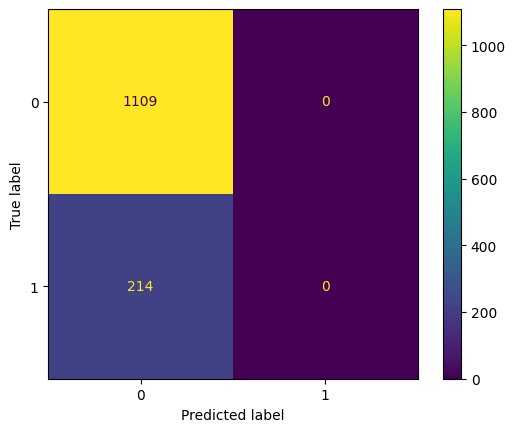

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mlp.predict(X_test))).plot()

In [ ]:
## 1) get a balanced data set (undersample one, smote)
## 2) you can adjust the threshold (other than 50%)
## 3) you can use both 1) and 2)

In [ ]:
## mlp is using 50% as the cutoff for the predict_proba
## Step 1: Get Model p_hat
p_hat = mlp.predict_proba(X_test)[:,1]

## Step 2: we need all possible thresholds, TPR, FPR
from sklearn.metrics import roc_curve, auc

## all thresholds, TPR and FPR
fpr, tpr, thresh= roc_curve(y_test, p_hat)


## Step 3: We get Youden's J statistic (optimal threshold)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresh[optimal_idx]
print("Optimal threshold:", optimal_threshold)


## check the performance with the optimal threshold
## the new prediction is made by using this optimal threshold as opposed to 50%
y_pred = (p_hat > optimal_threshold).astype(int)
y_pred

Optimal threshold: 4.427814208066082e-25


array([0, 0, 0, ..., 0, 0, 0])

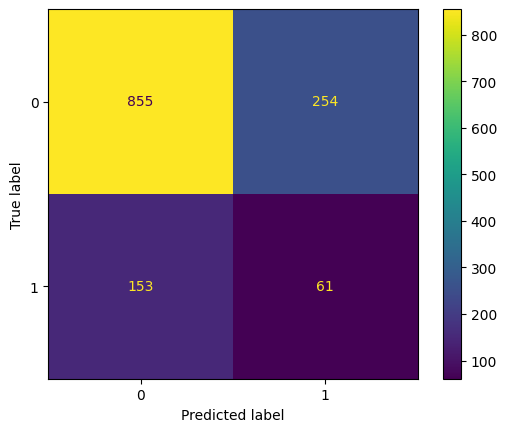

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [ ]:
## Grid Search - MLP

param_grid = {
    'hidden_layer_sizes': [(50,), (80,), (100,), (50, 25) ],
    'activation': ['logistic', 'tanh', 'relu'],
}

## instance model
nn = MLPClassifier(random_state = 13)

## grid search
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(nn, param_grid, cv=5, scoring = 'balanced_accuracy')

## fit
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=13),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (80,), (100,),
                                                (50, 25)]},
             scoring='balanced_accuracy')

In [ ]:
## load, dump joblib
import joblib
joblib.dump(grid_model, '/content/drive/MyDrive/neural_network.joblib')

['neural_network.joblib']

In [ ]:
## load
mlp_new = joblib.load('neural_network.joblib')

In [ ]:
mlp_new

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=13),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (80,), (100,),
                                                (50, 25)]},
             scoring='balanced_accuracy')